# Business Probem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading DataSet

In [2]:
df = pd.read_csv('student_info.csv')

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [5]:
df.isna().sum()

study_hours      5
student_marks    0
dtype: int64

In [6]:
df.shape

(200, 2)

In [7]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


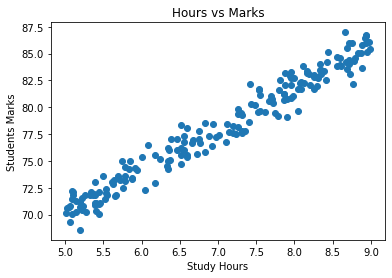

In [8]:
plt.scatter(df['study_hours'],df['student_marks']);
plt.xlabel('Study Hours')
plt.ylabel('Students Marks')
plt.title('Hours vs Marks');


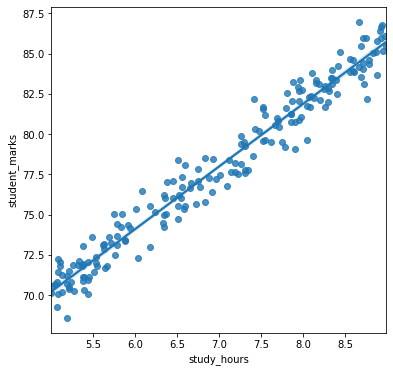

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.regplot(df['study_hours'],df['student_marks'])

# Data Cleaning

In [10]:
df.isna().sum()

study_hours      5
student_marks    0
dtype: int64

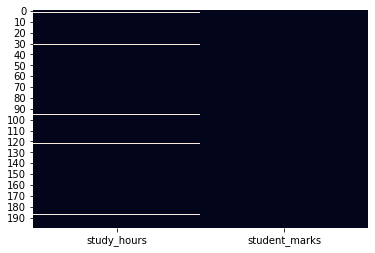

In [11]:
sns.heatmap(df.isna(),cbar=False)

In [12]:
df.fillna(df['study_hours'].mean(),inplace=True)

In [13]:
df.isna().sum()

study_hours      0
student_marks    0
dtype: int64

In [14]:
df.dtypes

study_hours      float64
student_marks    float64
dtype: object

In [15]:
# Splitting dataset into X and y
X = df.drop('student_marks',axis=1)
y = df['student_marks']

In [16]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Seecting a model

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
lr.score(X_test,y_test)

0.942580760104548

In [19]:
lr.score(X_train,y_train)

0.9617041525073161

In [20]:
lr.coef_

array([3.92640681])

In [21]:
lr.intercept_

50.43835070056993

In [22]:
lr.predict([[4]])[0].round(2)

66.14

In [23]:
y_pred = lr.predict(X_test)

In [24]:
y_pred

array([74.35016819, 76.15631533, 82.36003809, 80.00419401, 75.48882617,
       73.17224615, 82.83120691, 70.81640206, 71.60168343, 74.70354481,
       81.29990825, 84.44103371, 71.56241936, 70.42376138, 85.26557914,
       73.17224615, 73.01518988, 82.16371775, 76.58822008, 70.34523325,
       84.55882591, 75.41029803, 83.02752725, 81.45696453, 71.83726783,
       71.99432411, 77.45202958, 82.87047098, 84.79441032, 77.25570924,
       76.94159669, 83.459432  , 84.55882591, 74.15384785, 71.60168343,
       78.82627196, 83.14531946, 70.62008172, 81.33917232, 70.50228952])

In [25]:
pd.DataFrame(np.c_[X_test,y_test,y_pred], columns=['study_hours','original_marks','predicted_marks'])

,study_hours,original_marks,predicted_marks
0,6.09,76.48,74.350168
1,6.55,76.03,76.156315
2,8.13,82.27,82.360038
3,7.53,81.57,80.004194
4,6.38,77.01,75.488826
5,5.79,74.44,73.172246
6,8.25,82.79,82.831207
7,5.19,71.18,70.816402
8,5.39,73.02,71.601683
9,6.18,72.96,74.703545


In [26]:
from sklearn.metrics import mean_absolute_error,r2_score

In [27]:
mean_absolute_error(y_test,y_pred)

0.9876755341052214

In [28]:
r2_score(y_test,y_pred)

0.942580760104548

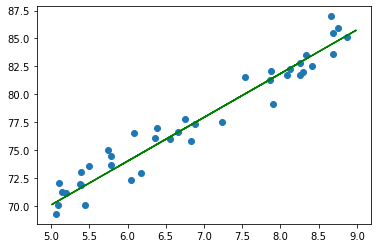

In [29]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color="g");


# Saving the model

In [30]:
import pickle

In [31]:
pickle.dump(lr,open('student_mark_predictor.pkl','wb'))

In [32]:
loaded_model = pickle.load(open("student_mark_predictor.pkl",'rb'))

In [33]:
loaded_model.score(X_test,y_test)

0.942580760104548

In [34]:
loaded_model.predict([[4]])[0].round(0)

66.0

In [35]:
df.dtypes

study_hours      float64
student_marks    float64
dtype: object